In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

In [2]:
# API URL
url_KRX = "http://data-dbg.krx.co.kr/svc/apis/idx/krx_dd_trd"
# 인증키 설정
auth_key = "956087495A1D4769A88B0F3411D0890EF02445EB"
# 헤더작성
headers = {"AUTH_KEY": auth_key,}

In [3]:
def get_monthly_data(year, month, whatKRX):
    # 시작일과 종료일 계산
    start_date = datetime(year, month, 1)
    if month == 12:
        end_date = datetime(year + 1, 1, 1) - timedelta(days=1)
    else:
        end_date = datetime(year, month + 1, 1) - timedelta(days=1)

    all_data = []
    current_date = start_date
    while current_date <= end_date:
        date_str = current_date.strftime("%Y%m%d")
        params_KRX = {"basDd": date_str}
        response_KRX = requests.get(url_KRX, headers=headers, params=params_KRX)

        if response_KRX.status_code == 200:
            data = response_KRX.json()
            if 'OutBlock_1' in data and data['OutBlock_1']:  # 데이터가 존재하는지 확인
                df = pd.DataFrame(data['OutBlock_1'])
                all_data.append(df)
        else:
            print(f"Error {response_KRX.status_code} on {date_str}: {response_KRX.text}")

        current_date += timedelta(days=1)

    if all_data:
        monthly_df = pd.concat(all_data, ignore_index=True)
        monthly_df = monthly_df.rename(columns={
        'BAS_DD': '기준일자',
        'IDX_CLSS': '계열구분',
        'IDX_NM': '지수명',
        'CLSPRC_IDX': '종가',
        'CMPPREVDD_IDX': '대비',
        'FLUC_RT': '등락률',
        'OPNPRC_IDX': '시가',
        'HGPRC_IDX': '고가',
        'LWPRC_IDX': '저가',
        'ACC_TRDVOL': '거래량',
        'ACC_TRDVAL': '거래대금',
        'MKTCAP': '상장시가총액'
        })
        monthly_df = monthly_df[monthly_df['지수명'] == whatKRX]
        monthly_df = monthly_df.reset_index(drop=True)
        return monthly_df
    else:
        return None

In [5]:
def get_yearly_data(year,whatKRX):
    all_data = []
    for month in range(1, 13):
        start_date = datetime(year, month, 1)
        if month == 12:
            end_date = datetime(year + 1, 1, 1) - timedelta(days=1)
        else:
            end_date = datetime(year, month + 1, 1) - timedelta(days=1)

        current_date = start_date
        while current_date <= end_date:
            date_str = current_date.strftime("%Y%m%d")
            params_KRX = {"basDd": date_str}
            response_KRX = requests.get(url_KRX, headers=headers, params=params_KRX)

            if response_KRX.status_code == 200:
                data = response_KRX.json()
                if 'OutBlock_1' in data and data['OutBlock_1']:
                    df = pd.DataFrame(data['OutBlock_1'])
                    all_data.append(df)
            else:
                print(f"Error {response_KRX.status_code} on {date_str}: {response_KRX.text}")

            current_date += timedelta(days=1)

    if all_data:
        yearly_df = pd.concat(all_data, ignore_index=True)
        yearly_df = yearly_df.rename(columns={
        'BAS_DD': '기준일자',
        'IDX_CLSS': '계열구분',
        'IDX_NM': '지수명',
        'CLSPRC_IDX': '종가',
        'CMPPREVDD_IDX': '대비',
        'FLUC_RT': '등락률',
        'OPNPRC_IDX': '시가',
        'HGPRC_IDX': '고가',
        'LWPRC_IDX': '저가',
        'ACC_TRDVOL': '거래량',
        'ACC_TRDVAL': '거래대금',
        'MKTCAP': '상장시가총액'
        })
        yearly_df = yearly_df[yearly_df['지수명'] == whatKRX]
        yearly_df = yearly_df.reset_index(drop=True)
        return yearly_df
    else:
        return None

In [60]:
money_2018_df = get_yearly_data(2018, 'KRX 300 금융')
money_2019_df = get_yearly_data(2019, 'KRX 300 금융')
money_2020_df = get_yearly_data(2020, 'KRX 300 금융')
money_2021_df = get_yearly_data(2021, 'KRX 300 금융')
money_2022_df = get_yearly_data(2022, 'KRX 300 금융')
money_2023_df = get_yearly_data(2023, 'KRX 300 금융')

money_5year_df = pd.concat([money_2018_df, money_2019_df, money_2020_df, money_2021_df, money_2022_df, money_2023_df], ignore_index=True)

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [33]:
def PRC(df):
    df_copy = df.copy()

    # '기준일자' 컬럼을 datetime 객체로 변환
    # 전처리가 된 상태에서 해야됨.
    df_copy['기준일자'] = pd.to_datetime(df_copy['기준일자'])

    df_copy['시가'] = df_copy['시가'].astype(float)
    df_copy['고가'] = df_copy['고가'].astype(float)
    df_copy['저가'] = df_copy['저가'].astype(float)

    df_copy = df_copy.set_index('기준일자')

    plt.figure(figsize=(12, 6))  # 그래프 크기 조절
    plt.plot(df_copy['시가'], label='OPN PRC')
    plt.plot(df_copy['고가'], label='HI PRC')
    plt.plot(df_copy['저가'], label='LW PRC')

    plt.title('KRX')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)

    # Y축 눈금 간격을 5분위로 제한
    plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5))

    plt.show()

In [34]:
def ACC(df):
    df_copy = df.copy()

    # '기준일자' 컬럼을 datetime 객체로 변환
    # 전처리가 된 상태에서 해야됨.
    df_copy['기준일자'] = pd.to_datetime(df_copy['기준일자'])

    df_copy['거래량'] = df_copy['거래량'].astype(float)
    df_copy['거래대금'] = df_copy['거래대금'].astype(float)

    df_copy = df_copy.set_index('기준일자')

    acc = [['거래량','ACC_TRDVOL'],['거래대금','ACC_TRDVAL']]
    for i in acc:
        plt.figure(figsize=(12, 6))  # 그래프 크기 조절
        plt.plot(df_copy[i[0]], label=i[1])

        plt.title(i[1])
        plt.xlabel('Date')
        plt.ylabel('Values')
        plt.legend()
        plt.grid(True)

        # Y축 눈금 간격을 5분위로 제한
        plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5))

        plt.show()

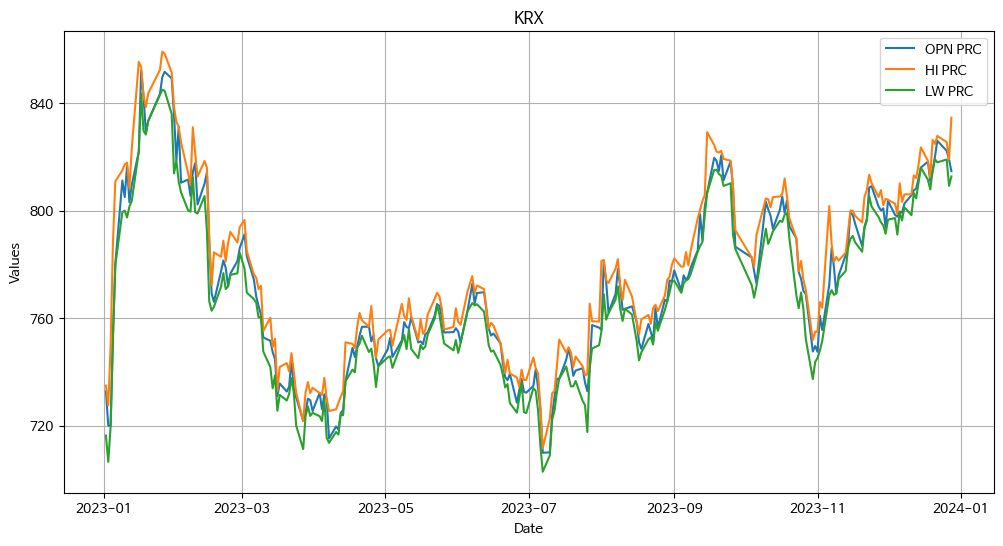

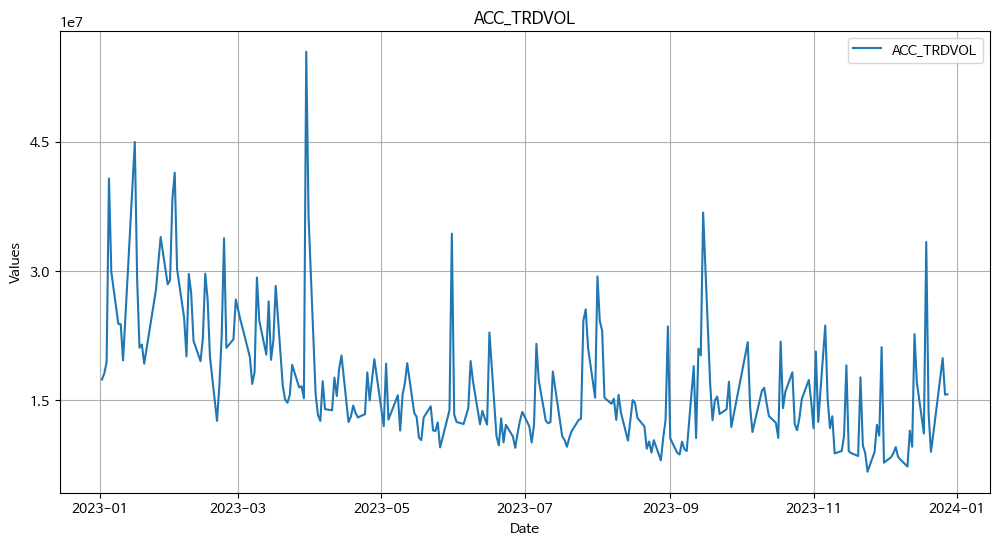

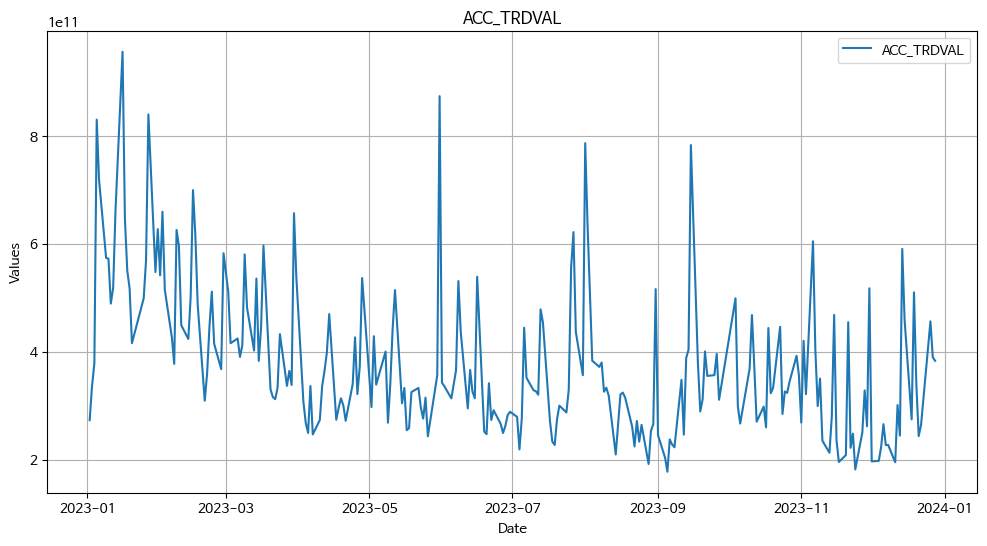

In [35]:
PRC(money_2023_df)
ACC(money_2023_df)

In [36]:
# 전날 대비 비율 계산 함수
def calculate_ratio(today, yesterday):
    if yesterday == 0:
        return 0
    else:
        return today / yesterday

def setRatio(df, newName, whatCol):
    df[whatCol] = pd.to_numeric(df[whatCol], errors='coerce').fillna(0)
    for i in range(1, len(df)):
        df.loc[i, newName] = calculate_ratio(df.loc[i, whatCol], df.loc[i - 1, whatCol])

In [37]:
def calculateNextDay(df, whatCol):
    df[whatCol] = pd.to_numeric(df[whatCol], errors='coerce').fillna(0)
    strNext = '다음날' + whatCol
    df[strNext] = 0
    for i in range(len(df) - 1):
        today_close = df.loc[i, whatCol]
        next_day_close = df.loc[i+1, whatCol]
        df.loc[i, strNext] = 1 if next_day_close > today_close else 0

In [38]:
def calculateDifferent(df, whatCol1, whatCol2):
    df[whatCol1] = pd.to_numeric(df[whatCol1], errors='coerce').fillna(0)
    df[whatCol2] = pd.to_numeric(df[whatCol2], errors='coerce').fillna(0)
    strNext = whatCol1 + '와' + whatCol2 + '차이'
    df[strNext] = 0.0
    for i in range(len(df)):
        df.loc[i, strNext] = abs(df.loc[i, whatCol1] - df.loc[i, whatCol2])

In [61]:
columns_to_convert = ['거래량', '거래대금', '시가', '고가', '저가', '종가']
for col in columns_to_convert:
    strRatio = '전날대비' + col + '비율'
    setRatio(money_5year_df, strRatio, col)

In [62]:
columns_to_next = ['종가']
for col in columns_to_next:
    calculateNextDay(money_5year_df, col)

In [63]:
# 다음날거래량과 다음날거래대금 컬럼 삭제하기
columns_to_drop = ['다음날거래량', '다음날거래대금']
money_5year_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [64]:
calculateDifferent(money_5year_df, '시가','고가')
calculateDifferent(money_5year_df, '시가','저가')
calculateDifferent(money_5year_df, '종가','고가')
calculateDifferent(money_5year_df, '종가','저가')

In [17]:
pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 14.8 MB/s eta 0:00:00


In [18]:
from pykrx import stock

In [45]:
# 시작일과 종료일 설정
start_date = "2018-01-01"
end_date = "2023-12-31"

# 코스피 지수 데이터를 가져와 데이터프레임으로 저장
kospi_index = stock.get_index_ohlcv_by_date(start_date, end_date, "1001")[['종가']].dropna()

In [65]:
kospi_index.index = money_5year_df.index
money_5year_df['KOSPI종가'] = kospi_index

In [21]:
def setMoneyRatio(df, newName, whatCol):
    df[whatCol] = pd.to_numeric(df[whatCol], errors='coerce').fillna(0)
    for i in range(1, len(df)):
        df.loc[i, newName] = calculate_ratio(df.loc[i, whatCol]- df.loc[i - 1, whatCol], df.loc[i - 1, whatCol])

In [66]:
setMoneyRatio(money_5year_df, 'KOSPI지수월간수익률', 'KOSPI종가')
setMoneyRatio(money_5year_df, '월간수익률', '종가')

In [23]:
def beta(df, target_date):
    # 날짜 형식 변환 및 1년 전 날짜 설정
    target_date = pd.to_datetime(target_date)
    one_year_ago = target_date - timedelta(days=365)

    # 기준일자 열을 datetime 형식으로 변환
    df['기준일자'] = pd.to_datetime(df['기준일자'], errors='coerce')

    # 1년 기간 필터링 및 인덱스 리셋
    filtered_df = df[(df['기준일자'] >= one_year_ago) & (df['기준일자'] <= target_date)].copy()
    filtered_df.reset_index(drop=True, inplace=True)

    # 월간 수익률 계산
    setMoneyRatio(filtered_df, 'KOSPI지수월간수익률', 'KOSPI종가')
    setMoneyRatio(filtered_df, '월간수익률', '종가')

    # 공분산과 분산 계산
    covariance = filtered_df['월간수익률'].cov(filtered_df['KOSPI지수월간수익률'])
    variance = np.var(filtered_df['KOSPI지수월간수익률'])

    # 베타 계산
    beta_value = covariance / variance
    return beta_value

In [67]:
money_5year_df['베타'] = money_5year_df['기준일자'].apply(lambda x: beta(money_5year_df, x))

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1675: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(a, b, ddof=ddof)[0, 1]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [68]:
# 이동평균선
money_5year_df['MA5'] = money_5year_df['종가'].rolling(window=5).mean()
money_5year_df['MA20'] = money_5year_df['종가'].rolling(window=20).mean()
money_5year_df['MA60'] = money_5year_df['종가'].rolling(window=60).mean()

In [69]:
# MACD
# ex). DataFrame.ewm(self, com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0)

money_5year_df['EMA12'] = money_5year_df['종가'].ewm(span=12, adjust=False).mean()
money_5year_df['EMA26'] = money_5year_df['종가'].ewm(span=26, adjust=False).mean()

money_5year_df['MACD'] = money_5year_df['EMA12'] - money_5year_df['EMA26']

In [70]:
# Signal 컬럼 및 데이터 추가
money_5year_df['Signal'] = money_5year_df['MACD'].ewm(span=9, adjust=False).mean()
money_5year_df['오실레이터'] = money_5year_df['MACD'] - money_5year_df['Signal']

In [71]:
# RSI

# 가격변동계산
money_5year_df['변동폭'] = money_5year_df['종가'].diff()

# 이득과 손실 계산
money_5year_df['이득'] = money_5year_df['변동폭'].apply(lambda x: x if x > 0 else 0)
money_5year_df['손실'] = money_5year_df['변동폭'].apply(lambda x: -x if x < 0 else 0)

# 2주 기준
money_5year_df['평균 이득'] = money_5year_df['이득'].rolling(window=14).mean()
money_5year_df['평균 손실'] = money_5year_df['손실'].rolling(window=14).mean()

# RS
money_5year_df['RS'] = money_5year_df['평균 이득'] / money_5year_df['평균 손실']

# RSI
money_5year_df['RSI'] = 100 - (100 / (1 + money_5year_df['RS']))

In [72]:
# Bollinger Bands

money_5year_df['하한선'] = money_5year_df['MA20'] - 2 * money_5year_df['종가'].rolling(window=20).std()
money_5year_df['상한선'] = money_5year_df['MA20'] + 2 * money_5year_df['종가'].rolling(window=20).std()

In [73]:
# ATR
tr1 = np.abs(money_5year_df["고가"] - money_5year_df["저가"])
tr2 = np.abs(money_5year_df["고가"] - money_5year_df["종가"].shift(1))
tr3 = np.abs(money_5year_df["저가"] - money_5year_df["종가"].shift(1))

tr = pd.DataFrame([tr1,tr2,tr3]).T.max(axis = 1)
money_5year_df["tr"] = tr
money_5year_df["atr"] = tr.rolling(14).mean()

In [74]:
money_5year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   기준일자          1477 non-null   datetime64[ns]
 1   계열구분          1477 non-null   object        
 2   지수명           1477 non-null   object        
 3   종가            1477 non-null   float64       
 4   대비            1477 non-null   object        
 5   등락률           1477 non-null   object        
 6   시가            1477 non-null   float64       
 7   고가            1477 non-null   float64       
 8   저가            1477 non-null   float64       
 9   거래량           1477 non-null   float64       
 10  거래대금          1477 non-null   float64       
 11  상장시가총액        1477 non-null   object        
 12  전날대비거래량비율     1476 non-null   float64       
 13  전날대비거래대금비율    1476 non-null   float64       
 14  전날대비시가비율      1476 non-null   float64       
 15  전날대비고가비율      1476 non-null   float64 

In [84]:
money_5year_df_copy = money_5year_df.copy()

In [82]:
money_5year_df = money_5year_df_copy.copy()

In [85]:
# 2018년 데이터 삭제
money_5year_df_copy = money_5year_df[money_5year_df['기준일자'].dt.year != 2018]
money_5year_df = money_5year_df.reset_index(drop=True)

In [58]:
money_5year_df.reset_index(drop=True, inplace=True)

In [86]:
columns_to_drop = ['계열구분', '지수명', '종가', '대비', '등락률', '시가', '고가', '저가', '거래량', '거래대금', '상장시가총액']
money_5year_df_copy.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [87]:
columns_to_drop = ['KOSPI지수월간수익률','월간수익률','EMA12','EMA26']
money_5year_df_copy.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [89]:
columns_to_drop = ['변동폭','이득','손실','평균 이득','평균 손실','tr']
money_5year_df_copy.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [90]:
money_5year_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1233 entries, 244 to 1476
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   기준일자        1233 non-null   datetime64[ns]
 1   전날대비거래량비율   1233 non-null   float64       
 2   전날대비거래대금비율  1233 non-null   float64       
 3   전날대비시가비율    1233 non-null   float64       
 4   전날대비고가비율    1233 non-null   float64       
 5   전날대비저가비율    1233 non-null   float64       
 6   전날대비종가비율    1233 non-null   float64       
 7   다음날종가       1233 non-null   int64         
 8   시가와고가차이     1233 non-null   float64       
 9   시가와저가차이     1233 non-null   float64       
 10  종가와고가차이     1233 non-null   float64       
 11  종가와저가차이     1233 non-null   float64       
 12  KOSPI종가     1233 non-null   float64       
 13  베타          1233 non-null   float64       
 14  MA5         1233 non-null   float64       
 15  MA20        1233 non-null   float64       
 16  MA60        1233 non-null  

In [76]:
money_5year_df_copy.set_index('기준일자', inplace=True)

### 전처리(일단 스킵)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 정규화할 컬럼 선택 (기준일자 제외)
columns_to_normalize = [col for col in money_2023_df.columns if col != '기준일자']

# 숫자형 데이터만 정규화
numeric_cols = money_2023_df[columns_to_normalize].select_dtypes(include=['number'])

# 정규화 수행
normalized_data = scaler.fit_transform(numeric_cols)

# 정규화된 데이터를 DataFrame으로 변환
normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols.columns)

# 기준일자 컬럼을 다시 추가
normalized_df['기준일자'] = money_2023_df['기준일자']
normalized_df.dropna(subset='기준일자', inplace=True)

### 대애음

In [91]:
money_5year_df_copy.set_index('기준일자', inplace=True)

In [92]:
# '다음날 종가' 컬럼을 맨 뒤로 이동
cols = list(money_5year_df_copy.columns)
cols.remove('다음날종가')
cols.append('다음날종가')
money_5year_df_copy = money_5year_df_copy[cols]

## 모델

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [94]:
# 특성(X)과 타겟(y) 분리
X = money_5year_df_copy.drop('다음날종가', axis=1)
y = money_5year_df_copy['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

In [95]:
# 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [96]:
# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5


### 다르게 시도

In [ ]:
money_2019_df = get_yearly_data(2019, 'KRX 300 금융')
money_2020_df = get_yearly_data(2020, 'KRX 300 금융')
money_2021_df = get_yearly_data(2021, 'KRX 300 금융')
money_2022_df = get_yearly_data(2022, 'KRX 300 금융')
money_2023_df = get_yearly_data(2023, 'KRX 300 금융')

money_5year_df = pd.concat([money_2019_df, money_2020_df, money_2021_df, money_2022_df, money_2023_df], ignore_index=True)

In [ ]:
calculateNextDay(money_5year_df, '종가')

In [ ]:
# '다음날 종가' 컬럼을 맨 뒤로 이동
cols = list(money_5year_df.columns)
cols.remove('다음날종가')
cols.append('다음날종가')
money_5year_df = money_5year_df[cols]

In [ ]:
# 특성(X)과 타겟(y) 분리
X = money_5year_df.drop('다음날종가', axis=1)
y = money_5year_df['다음날종가']

# 숫자형 데이터만 사용
X = X.select_dtypes(include=['number'])

# 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습 (RandomForestClassifier 예시)
model = RandomForestClassifier(random_state=42)  # 다른 모델 사용 가능
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4939271255060729
